#TAREA 1 DATA MINING
- Estudiante: Jorge Luis David Mesa 
- cc: 1007322018

In [1]:
import string
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from urllib.request import urlopen
contents = urlopen("https://www.gutenberg.org/files/76/76-0.txt").read().decode('utf-8')

a) Analice el libro contando la aparición de tres nombres de personajes principales: Jim, Tom, Huck a través de los capítulos del libro.

In [2]:
start = contents.rfind('CHAPTER I.')
contents = contents[start:len(contents)]
book = contents.split('CHAPTER')
book = book[1:]

In [3]:
punct = string.punctuation
space = string.whitespace

In [4]:
names = ['JIM', 'TOM', 'HUCK']

TOM = np.zeros(len(book))
JIM = np.zeros(len(book))
HUCK = np.zeros(len(book))

In [5]:
for j in range(len(book)):
  book[j] = book[j].upper()
  for i in punct:
    book[j] = book[j].replace(i, "")

  for i in space:
    book[j] = book[j].replace(i, ".")

for i in range(len(names)):
  names[i] = '.' + names[i] + '.' 

In [6]:
for j in range(len(book)):
  JIM[j] = book[j].count(names[0])
  TOM[j] = book[j].count(names[1])
  HUCK[j] = book[j].count(names[2])

In [49]:
print('Apariciones JIM :',JIM)
print('Apariciones TOM :',TOM)
print('Apariciones HUCK :',HUCK)

Apariciones JIM : [ 0. 15.  0.  8.  0.  0.  0. 13. 10. 17.  3. 17.  8.  5. 12. 21.  0.  6.
 12. 17.  1.  0.  9.  4.  0.  0.  0.  1.  3.  5. 14.  0.  2. 14. 10. 16.
  3. 21.  7.  9.  0. 11.  5.]
Apariciones TOM : [ 5. 23.  5.  0.  0.  0.  2.  2.  0.  0.  2.  3.  1.  0.  0.  0.  3.  3.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  3. 16. 14. 10. 17.
  9. 26. 11.  9.  6. 22.  5.]
Apariciones HUCK : [0. 2. 2. 0. 0. 2. 0. 3. 1. 0. 2. 0. 0. 2. 4. 9. 0. 1. 0. 0. 0. 0. 4. 0.
 0. 0. 0. 0. 0. 0. 2. 0. 0. 4. 7. 1. 0. 2. 0. 3. 0. 2. 2.]


b) Guarde sus resultados en un formato Pandas DataFrame para que se vea de la siguiente manera:

In [8]:
CHAPTERS = np.zeros(len(book))


In [9]:
lst = list(range(1,len(book)+1))
for j in range(len(book)):
  lst[j] = 'CHAPTER' + ' ' + str(lst[j])


 

In [10]:
names = ['JIM', 'TOM', 'HUCK']

In [11]:
data = [JIM,TOM,HUCK]

df = pd.DataFrame(data,columns=lst)
df.insert(0, "NAMES", names, True)
df

,NAMES,CHAPTER 1,CHAPTER 2,CHAPTER 3,CHAPTER 4,CHAPTER 5,CHAPTER 6,CHAPTER 7,CHAPTER 8,CHAPTER 9,...,CHAPTER 34,CHAPTER 35,CHAPTER 36,CHAPTER 37,CHAPTER 38,CHAPTER 39,CHAPTER 40,CHAPTER 41,CHAPTER 42,CHAPTER 43
0,JIM,0.0,15.0,0.0,8.0,0.0,0.0,0.0,13.0,10.0,...,14.0,10.0,16.0,3.0,21.0,7.0,9.0,0.0,11.0,5.0
1,TOM,5.0,23.0,5.0,0.0,0.0,0.0,2.0,2.0,0.0,...,14.0,10.0,17.0,9.0,26.0,11.0,9.0,6.0,22.0,5.0
2,HUCK,0.0,2.0,2.0,0.0,0.0,2.0,0.0,3.0,1.0,...,4.0,7.0,1.0,0.0,2.0,0.0,3.0,0.0,2.0,2.0


c) Exporte la tabla a un archivo CSV.

In [13]:
df.to_csv('NAMES_CHAPTERS_Adventures_of_Huckleberry_Finn.csv',index=False)


d) Importe el archivo CSV guardado usando Pandas y haga un gráfico de la ocurrencia acumulada (cumsum) de los caracteres

In [14]:
df1 = pd.read_csv('NAMES_CHAPTERS_Adventures_of_Huckleberry_Finn.csv')
df1

,NAMES,CHAPTER 1,CHAPTER 2,CHAPTER 3,CHAPTER 4,CHAPTER 5,CHAPTER 6,CHAPTER 7,CHAPTER 8,CHAPTER 9,...,CHAPTER 34,CHAPTER 35,CHAPTER 36,CHAPTER 37,CHAPTER 38,CHAPTER 39,CHAPTER 40,CHAPTER 41,CHAPTER 42,CHAPTER 43
0,JIM,0.0,15.0,0.0,8.0,0.0,0.0,0.0,13.0,10.0,...,14.0,10.0,16.0,3.0,21.0,7.0,9.0,0.0,11.0,5.0
1,TOM,5.0,23.0,5.0,0.0,0.0,0.0,2.0,2.0,0.0,...,14.0,10.0,17.0,9.0,26.0,11.0,9.0,6.0,22.0,5.0
2,HUCK,0.0,2.0,2.0,0.0,0.0,2.0,0.0,3.0,1.0,...,4.0,7.0,1.0,0.0,2.0,0.0,3.0,0.0,2.0,2.0


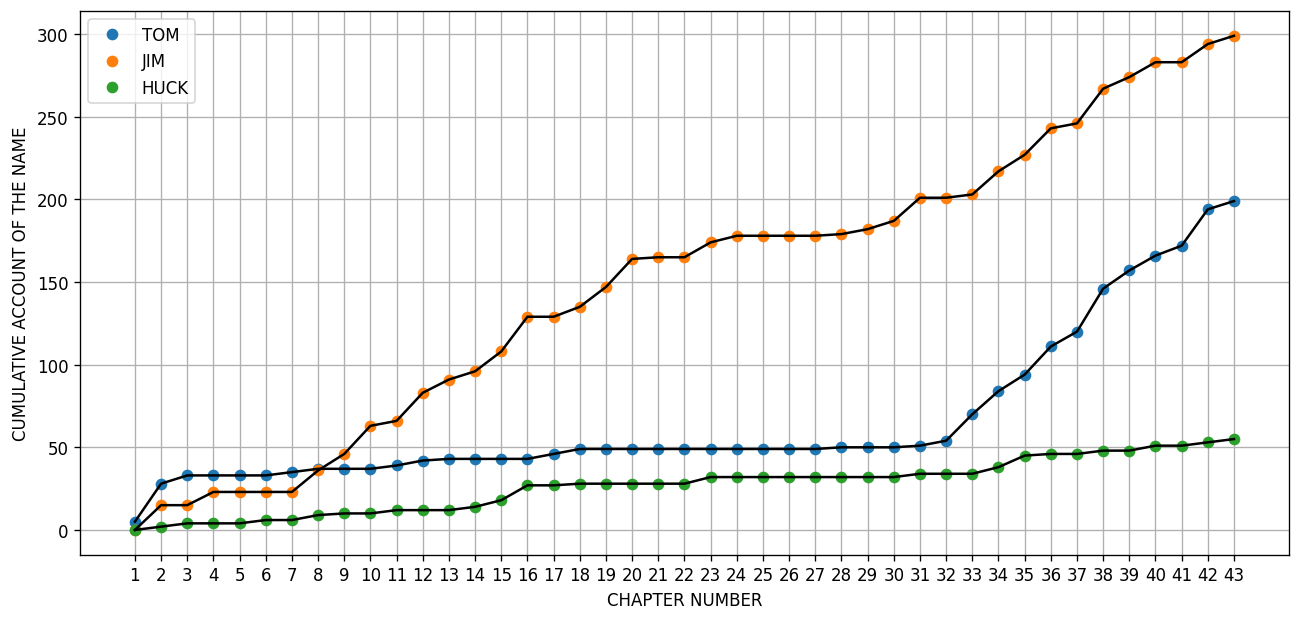

In [42]:
TOM_cumsum=np.cumsum(TOM)
JIM_cumsum=np.cumsum(JIM)
HUCK_cumsum=np.cumsum(HUCK)

N = np.linspace(1,43,len(book))


plt.figure(figsize=(13,6),dpi=120)
plt.plot(N,TOM_cumsum,'o',label = 'TOM')
plt.plot(N,JIM_cumsum,'o',label = 'JIM')
plt.plot(N,HUCK_cumsum,'o',label = 'HUCK')
plt.plot(N,TOM_cumsum,'k')
plt.plot(N,JIM_cumsum,'k')
plt.plot(N,HUCK_cumsum,'k')
plt.xticks(N)
plt.xlabel('CHAPTER NUMBER')
plt.ylabel('CUMULATIVE ACCOUNT OF THE NAME')
plt.grid()
plt.legend()